## Step 1. Library Import & Load Dataset

### 1-a. Library

In [1]:
import tensorflow as tf 

import numpy as np 
import matplotlib.pyplot as plt 

### 1-b. Datasets

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


### 1-c. Shape of Data

In [7]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [8]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [12]:
print(X_train[0].shape)

(28, 28)


In [14]:
print(X_test[0].shape)

(28, 28)


In [18]:
print(y_train, len(y_train))

[9 0 0 ... 3 0 5] 60000


In [19]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [17]:
print(y_test, len(y_test))

[9 2 1 ... 8 1 5] 10000


In [20]:
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### 1-d. Show Image

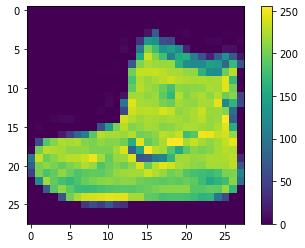

In [21]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

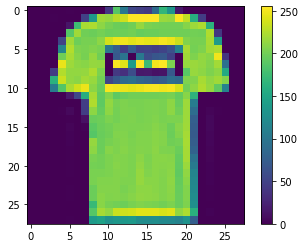

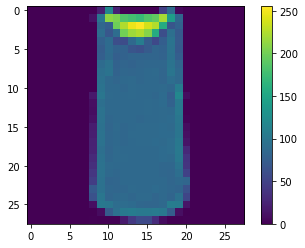

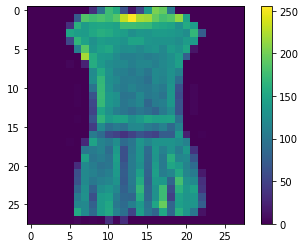

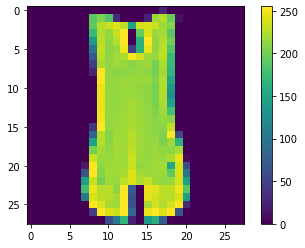

In [24]:
for i in range(1,5):
    plt.figure()
    plt.imshow(X_train[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

## Step 2. Data Preprocessing

### 2-a. class name (y)

In [25]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 2-b. Normalization (X)

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### 3-c. Visualization (X)

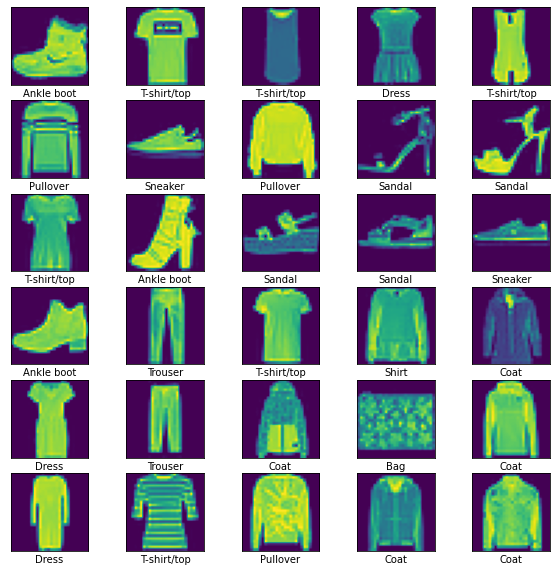

In [34]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.grid(False)
    plt.xlabel(class_name[y_train[i]])
plt.show()
    

## Step 3. Modeling

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [36]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## Step 4. Model Compile

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## Step 5. Model Training

In [38]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 856us/step - loss: 0.4985 - acc: 0.8239
Epoch 2/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.3746 - acc: 0.8635
Epoch 3/10
1875/1875 [==============================] - 2s 868us/step - loss: 0.3374 - acc: 0.8770
Epoch 4/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.3129 - acc: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 858us/step - loss: 0.2952 - acc: 0.8913
Epoch 6/10
1875/1875 [==============================] - 2s 870us/step - loss: 0.2774 - acc: 0.8980
Epoch 7/10
1875/1875 [==============================] - 2s 859us/step - loss: 0.2636 - acc: 0.9021
Epoch 8/10
1875/1875 [==============================] - 2s 860us/step - loss: 0.2561 - acc: 0.9046
Epoch 9/10
1875/1875 [==============================] - 2s 867us/step - loss: 0.2463 - acc: 0.9076
Epoch 10/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.2359 - acc: 0.9111


## Step 6. Model Evaluation

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss : ', test_loss)
print('test accuracy : ', test_acc)

313/313 [==============================] - 0s 670us/step - loss: 0.3222 - acc: 0.8884
test loss :  0.32219886779785156
test accuracy :  0.8884000182151794


## Step 7. Prediction

### 7-a. using predict method

In [41]:
predictions = model.predict(X_test)

In [45]:
print(X_test.shape, len(predictions))

(10000, 28, 28) 10000


In [46]:
predictions[0]

array([1.4120958e-07, 1.1616419e-08, 5.5967195e-07, 5.1977338e-08,
       7.1987422e-08, 2.3954551e-04, 5.0548749e-07, 6.9533149e-03,
       2.7267376e-08, 9.9280578e-01], dtype=float32)

### 7-b. predict y

In [47]:
np.argmax(predictions[0])

9

In [48]:
np.argmax(predictions[0]) == y_test[0]

True